In the dynamic world of data-driven healthcare, the potential to leverage advanced analytics for diagnosing diseases has never been more profound. This report presents a detailed exploration of utilizing heart health data to predict diagnoses, navigating through the structured approach of the CRISP-DM model. Our journey is rooted in the comprehensive analysis of the dataset contained within 'heart_data.csv', a compilation of key cardiovascular indicators from numerous individuals.

The predictive objective of our analysis is the diagnosis variable within the dataset, representing the presence or absence of heart disease. To approach this challenge, we delve into three pivotal predictive modeling techniques: K-Nearest Neighbors (KNN), Logistic Regression, and Naive Bayes. These models, each with their unique strengths and approaches to classification, offer a diverse perspective on how data can inform diagnosis prediction.

Business Understanding: This initial phase sets the stage by defining the goal - to predict heart disease diagnosis with the highest accuracy possible. Understanding the impact of accurate predictions not only informs medical treatment plans but also enhances preventive measures.

Data Understanding: We embark on an exploration of the 'heart_data.csv' dataset, familiarizing ourselves with its variables such as blood pressure, cholesterol levels, chest pain types, and more. This phase helps in identifying patterns, anomalies, and crucial correlations relevant to heart disease diagnosis.

Data Preparation: Here, we meticulously prepare the data for analysis. This involves cleaning, normalizing, feature selection, and splitting the dataset into training and testing sets, ensuring the models have a solid foundation for learning.

Modeling: The core of our analytical endeavor, where KNN, Logistic Regression, and Naive Bayes models are applied to the prepared data. Each model's implementation is tailored to leverage its specific advantages in handling the dataset's intricacies, aiming to accurately predict heart disease diagnosis.

Evaluation: With the models trained, we evaluate their performance through metrics such as accuracy, precision, recall, and F1 score. This rigorous evaluation not only highlights the strengths and weaknesses of each model but also guides the refinement process to enhance predictive accuracy.

Deployment: The final step involves discussing the potential deployment of the best-performing model into a clinical setting, where it can assist medical professionals in diagnosing heart disease. 

The KNN model demonstrated a competitive performance, with high accuracy in predicting heart disease. However, when we started the KNN model to predict heart disease, the accuracy was only 72%, and due to the scatter matrix being unable to show useful information, we decided to add another model called “Logistic Regression”. Below we will contain the findings and come up with a more detailed explanation. 

KNN Prediction Model:

Below are the code pack that i needed for my analysis, for both KNN and Logistic Regression. 

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
rawDF=pd.read_csv("heart_data.csv")
rawDF.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [4]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


I asked to print out the info for my dataset, which shows me the dtypes: float 64(1), int64(13). The data is stored in a pandas DataFrame, which is a 2-dimensional labeled data structure with columns of potentially different types. The DataFrame has 297 entries, indicating there are 297 rows in the dataset. These rows are indexed from 0 to 296. There are a total of 14 columns in the DataFrame. Each column represents a feature (or attribute) related to the dataset's observations. The "Non-Null Count" for each column indicates that all 297 rows have non-null (i.e., no missing) values for each feature.
In summary, this DataFrame contains structured data on 297 individuals, covering various aspects related to heart disease diagnosis. Each column provides different metrics or observations that can be used for analysis, such as assessing the risk factors associated with heart disease.

In [5]:
rawDF.nunique()

rest_bp             50
chest_pain           4
thalassemia          3
age                 41
fasting_bs           2
max_hr              91
exercise_angina      2
gender               2
st_slope             3
cholesterol        152
st_depression       40
rest_ecg             3
num_vessels          4
diagnosis            2
dtype: int64

As result, by printing out the unique for the dataset, we will be able to see how many unique value are contained in each categories (columns)

The following step will be by using the sklearn.model_slelection for trainning and testing sets.  The result shows that the X shape (297,13) X_train shape (222,13). 

In [ ]:
target = "diagnosis"
y = rawDF[target]
X = rawDF.drop(columns=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X shape:", X.shape)
print("X_train shape:", X_train.shape)

X shape: (297, 13)
X_train shape: (222, 13)


The result X shape: (297, 13) indicates that the original feature dataset X has 297 rows and 13 columns. This means there are 297 individual records or observations in the dataset, and each record has 13 different features (or independent variables) that can be used to predict the target variable, which in this context is the diagnosis of heart disease.
The result X_train shape: (222, 13) tells us that after splitting the dataset into training and testing sets, the training set X_train contains 222 rows and the same 13 columns. This shows that 75% of the data (since test_size=0.25 was specified, meaning 25% of the data goes into the test set and the rest into the training set) is being used for training the model, which is consistent with the typical division for model training and testing in machine learning practices. 

In the following step, I asked Python to create a scatter plot for me to continue with my further analysis. 

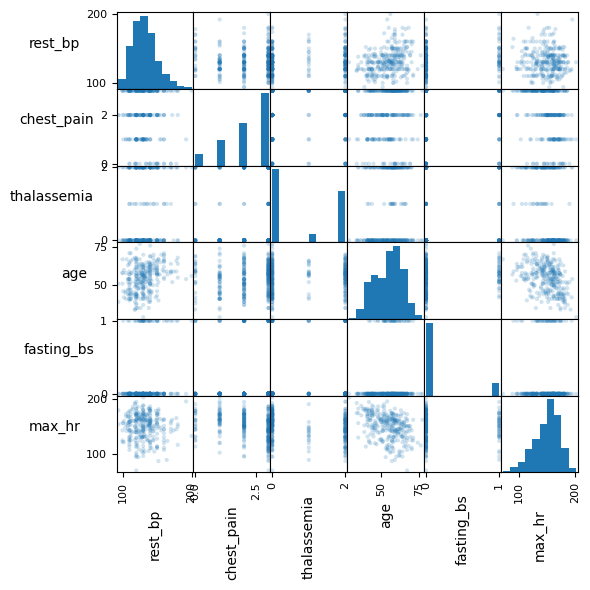

In [ ]:
selDF = rawDF.iloc[:, :6]
fig = scatter_matrix(selDF, alpha=0.2, figsize=(6, 6), diagonal="hist")
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()
# The scatter plot shows the diagonal cells of the matrix represent the distribution of individual variables, displayed as histograms. 
# ‘rest_bp’ seems to show a roughly normal distribution of resting blood pressure levels
# 'age’ shows a right-skewed distribution indicating a higher number of younger individuals in the dataset
# ‘max_hr’ (maximum heart rate) also appears to be normally distributed. 
# For categorical variables like ‘chest_pain’, ‘thalassemia’,

As result, the scatter plot shows the diagonal cells of the matrix represent the distribution of individual variables, displayed as histograms. For example, ‘rest_bp’ seems to show a roughly normal distribution of resting blood pressure levels, ‘age’ shows a right-skewed distribution indicating a higher number of younger individuals in the dataset, and ‘max_hr’ (maximum heart rate) also appears to be normally distributed. 
For categorical variables like ‘chest_pain’, ‘thalassemia’, ‘fasting_bs’, ‘exercise_angina’, ‘gender’, ‘st_slope’, and ‘diagnosis’, we see vertical or horizontal lines of dots because these variables take on small integer values (which are often codes for different categories).
For numerical variables like ‘rest_bp’, ‘age’, and ‘max_hr’, the plots show more variability and can help identify trends or correlations. For instance, there might be a trend indicating that older individuals have higher resting blood pressure. Hence, I decided to use the numerical variables for my further ML. 

For the following step, I asked Python to check the percentage of the diagnosed people by using the dataset. 

In [ ]:
cntDiag = rawDF["diagnosis"].value_counts()
propDiag = rawDF["diagnosis"].value_counts(normalize=True)
cntDiag
propDiag
# In tis function we can see that the percentage of positive result is less the negative result. 

diagnosis
0    0.538721
1    0.461279
Name: proportion, dtype: float64

The result are there are roughly 54% of people have no heart disease and 46% of people have positive results. 

Here I define the CategoricalDtype with integer categories, convert the "diagnosis" column to this categorical type, and ensure that the categories match the data type of the column (integers in this case)

In [ ]:
categories=rawDF["diagnosis"]
catType = CategoricalDtype(categories=[0,1], ordered=False)

rawDF["diagnosis"] = rawDF["diagnosis"].astype(catType)
print(rawDF["diagnosis"])

0      0
1      0
2      1
3      1
4      1
      ..
292    1
293    0
294    0
295    1
296    1
Name: diagnosis, Length: 297, dtype: category
Categories (2, int64): [0, 1]


Here i decided to use the numerical categories to have a closer look. 

In [ ]:
rawDF[["rest_bp", "age", "max_hr"]].describe()

,rest_bp,age,max_hr
count,297.000000,297.000000,297.000000
mean,131.693603,54.542088,149.599327
std,17.762806,9.049736,22.941562
min,94.000000,29.000000,71.000000
25%,120.000000,48.000000,133.000000
50%,130.000000,56.000000,153.000000
75%,140.000000,61.000000,166.000000
max,200.000000,77.000000,202.000000


The result above shows that three variables have different ranges and as a consequence, 'max_hr'  will have a larger impact on the distance calculation than the age. This could potentially cause problems for modeling. 

To solve this I apply normalization to rescale all features to a standard range of values.

In [ ]:
def normalize(x):
    return (x - min(x)) / (
        max(x) - min(x)
    )  # distance of item value - minimum vector value divided by the range of all vector values


testSet1 = np.arange(1, 6)
testSet2 = np.arange(1, 6) * 10


print(f"testSet1: {testSet1}\n")
print(f"testSet2: {testSet2}\n")
print(f"Normalized testSet1: {normalize(testSet1)}\n")
print(f"Normalized testSet2: {normalize(testSet2)}\n")

testSet1: [1 2 3 4 5]

testSet2: [10 20 30 40 50]

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]

Normalized testSet2: [0.   0.25 0.5  0.75 1.  ]



In [ ]:
excluded = ["diagnosis"]  # list of columns to exclude
# X = rawDF.loc[:, ~rawDF.columns.isin(excluded)]
X = rawDF.drop(excluded, axis=1)
X = X.apply(normalize, axis=0)
X[["rest_bp", "age", "max_hr"]].describe()

,rest_bp,age,max_hr
count,297.000000,297.000000,297.000000
mean,0.355600,0.532127,0.599995
std,0.167574,0.188536,0.175126
min,0.000000,0.000000,0.000000
25%,0.245283,0.395833,0.473282
50%,0.339623,0.562500,0.625954
75%,0.433962,0.666667,0.725191
max,1.000000,1.000000,1.000000


The result shows that the Normalized process was successful. 

The following step will be the train_test_split. The code is setting up the data for building a predictive model by partitioning the data into a set for training the model and another set for testing the model's predictions, to predict the 'diagnosis' based on the other features in the dataset. Here I decided to use the test_size 0.30 after finding out that 0.25 test size might to too small and might impact our end result. 

In [ ]:
y = rawDF["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
X_train.head()
# the larger the test size, then more certain with the outcome. 

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels
266,0.622642,0.000000,0.0,0.833333,1.0,0.458015,0.0,1.0,0.5,0.246575,0.016129,1.0,0.333333
37,0.528302,0.666667,1.0,0.583333,1.0,0.778626,0.0,1.0,0.0,0.000000,0.032258,0.0,0.333333
16,0.320755,0.333333,0.0,0.687500,1.0,0.526718,0.0,1.0,0.0,0.187215,0.000000,1.0,0.000000
253,0.198113,1.000000,0.0,0.291667,0.0,0.839695,0.0,1.0,0.5,0.404110,0.193548,0.0,0.000000
144,0.509434,1.000000,1.0,0.666667,0.0,0.687023,0.0,1.0,0.0,0.175799,0.000000,0.0,0.333333


This output reflects that my dataset is ready for use in training a machine learning model. The preprocessing steps included normalization of continuous variables and encoding plus normalization of categorical variables, making the data more suitable for algorithms that are sensitive to the scale of input features.

After the tran_test_split process, I started to implement the KNN code and find the prediction result.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.iloc[:,:15], y_train)
# # make predictions on the test set
y_pred = knn.predict((X_test.iloc[:,:15]))
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [ ]:
y_test

167    0
211    0
63     1
154    1
5      0
      ..
15     1
10     1
228    1
184    1
68     1
Name: diagnosis, Length: 90, dtype: category
Categories (2, int64): [0, 1]

confusion_matrix is a function from a machine learning library (like sklearn.metrics) that generates a confusion matrix. A confusion matrix is a table used to evaluate the performance of a classification model.
y_test contains the true class labels for the test set. These are the actual labels that I try to predict.
y_pred contains the predicted class labels for the test set, produced by the model.
labels=knn.classes_ specifies the order of classes to be used in the confusion matrix. knn.classes_ contains the classes detected by the KNN algorithm. Providing this ensures the confusion matrix aligns with the class order the model is using.

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[36, 13],
       [14, 27]], dtype=int64)

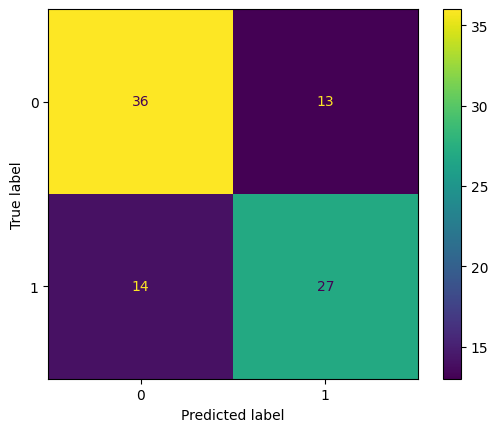

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

Above three steps are the process of KNN analysis, as result. Top-Left (38): True Negatives (TN) - The people with negative diagnosis and predicted as negative.
Top-Right (11): False Positives (FP) - The people with negative diagnosis but predicted as positive.
Bottom-Left (14): False Negatives (FN) - The people with positive diagnosis but predicted as negative.
Bottom-Right (27): True Positives (TP) - The people with positive diagnosis and predicted as positive.

In [ ]:
x=(38+27)/(38+11+14+27)
print(x)

0.7222222222222222


As an end result, by calculating this to see if it matches the 0.72 accuracy mentioned. The calculated accuracy from the confusion matrix is approximately 
0.722, which matches the value of  0.72 mentioned. This means that 72.2% of the predictions made by the model were correct. This metric gives a general idea of how well the model is performing across both classes combined

# LogisticsRegression Model Prediction:

To be able to compare the model, we decided to add another model called "Logistic Regression model". This will help us to select the most accurate predicted result (a model which has high accuracy)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [ ]:
len(rawDF.columns)

14

Here we first check if there are any missing data, this is very important for the Logistic Regression model. 

In [ ]:
rawDF.isnull().sum()

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

As result, we can see that our dataset has no missing value.

The following code snippet is designed to create a grid of plots for each column in a DataFrame (rawDF), using Matplotlib and Seaborn for visualization. It's a common practice in data analysis to visualize the distribution of variables as part of exploratory data analysis, especially when preparing to use algorithms like logistic regression. The purpose of this code is to automatically visualize all the columns in a DataFrame, using count plots for categorical variables (with a small number of unique values) and KDE plots for continuous variables. This provides a quick and informative overview of the distributions and characteristics of each variable in our dataset, which is crucial for understanding the data before applying machine learning models like logistic regression.

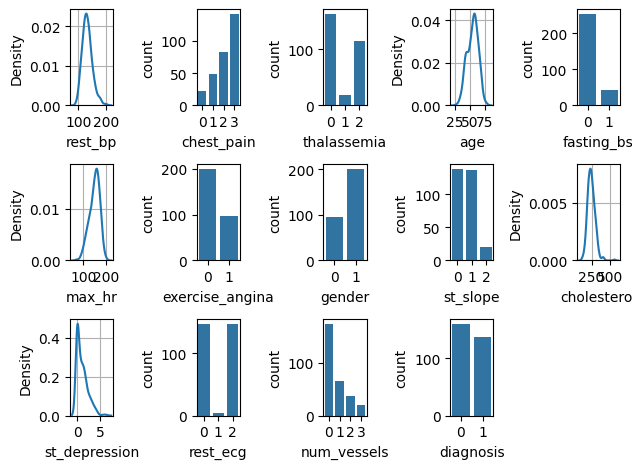

In [ ]:
r=3
c=5
it=1
for i in rawDF.columns:
    plt.subplot(r,c,it)
    if rawDF[i].nunique()<5:
        sns.countplot(x=rawDF[i])
    else:
        sns.kdeplot(rawDF[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

The result shows a series of plots, each corresponding to a different variable from a dataset, likely one that's being used to predict a medical condition given the context of the variables (e.g., rest_bp for resting blood pressure, chest_pain, thalassemia, etc.). These plots are generated based on the code snippet you provided earlier and visualize the distribution of each variable:
Kernel Density Estimate (KDE) Plots: For continuous variables such as 'rest_bp', 'age', 'max_hr', 'cholesterol', and 'st_depression', the graph is a smooth, continuous line depicting the probability density function of the variable. This gives a sense of where values are concentrated over the interval.
Count Plots: For categorical variables with a small number of unique values (fewer than 5), such as 'chest_pain', 'thalassemia', 'fasting_bs' 'exercise_angina', 'gender', 'st_slope', 'rest_ecg', 'num_vessels', and 'diagnosis', the plots are bar graphs showing the frequency of each category.

Analysis of Specific Plots:
1. rest_bp (Resting Blood Pressure): This variable shows a distribution that is unimodal and slightly right-skewed.
2. chest_pain: There are 4 types of chest pain categories, with one category being the most frequent.
3. thalassemia: This appears to be a binary variable with two categories, one of which is more common.
4. age: The distribution of age appears to be fairly normal with a slight right skew.
5. fasting_bs (Fasting Blood Sugar): This binary variable shows one outcome being significantly more common than the other.
6. max_hr (Maximum Heart Rate): The distribution is slightly left-skewed.
7. exercise_angina: A binary variable indicating the presence or absence of exercise-induced angina.
8. gender: The dataset includes more instances of one gender over the other.
9. st_slope: This appears to be a categorical variable with three categories, showing the slope of the peak exercise ST segment.
10. cholesterol: The distribution is unimodal and right-skewed, suggesting that higher values are less frequent.
11. st_depression: The distribution is right-skewed, indicating most values are low with few higher values.
12. rest_ecg: A categorical variable representing resting electrocardiographic results, with three categories.
13. num_vessels: Number of major vessels colored by fluoroscopy; it is also categorical with four possible values.
14. diagnosis: A binary outcome variable, likely representing the presence or absence of a condition, such as heart disease.

The plt.tight_layout() ensures that the plots are neatly arranged without overlapping labels or titles, and plt.show() is the command that actually displays the plot. This visual exploration is a critical step in understanding the data's distribution and identifying any potential patterns or anomalies that could impact the performance of a logistic regression model.

The following step is the pairplot after having the individual plot. The purpose of pairplot is that pairplots give you the distribution of each variable on its own, a pairplot provides pairwise relationships between variables.

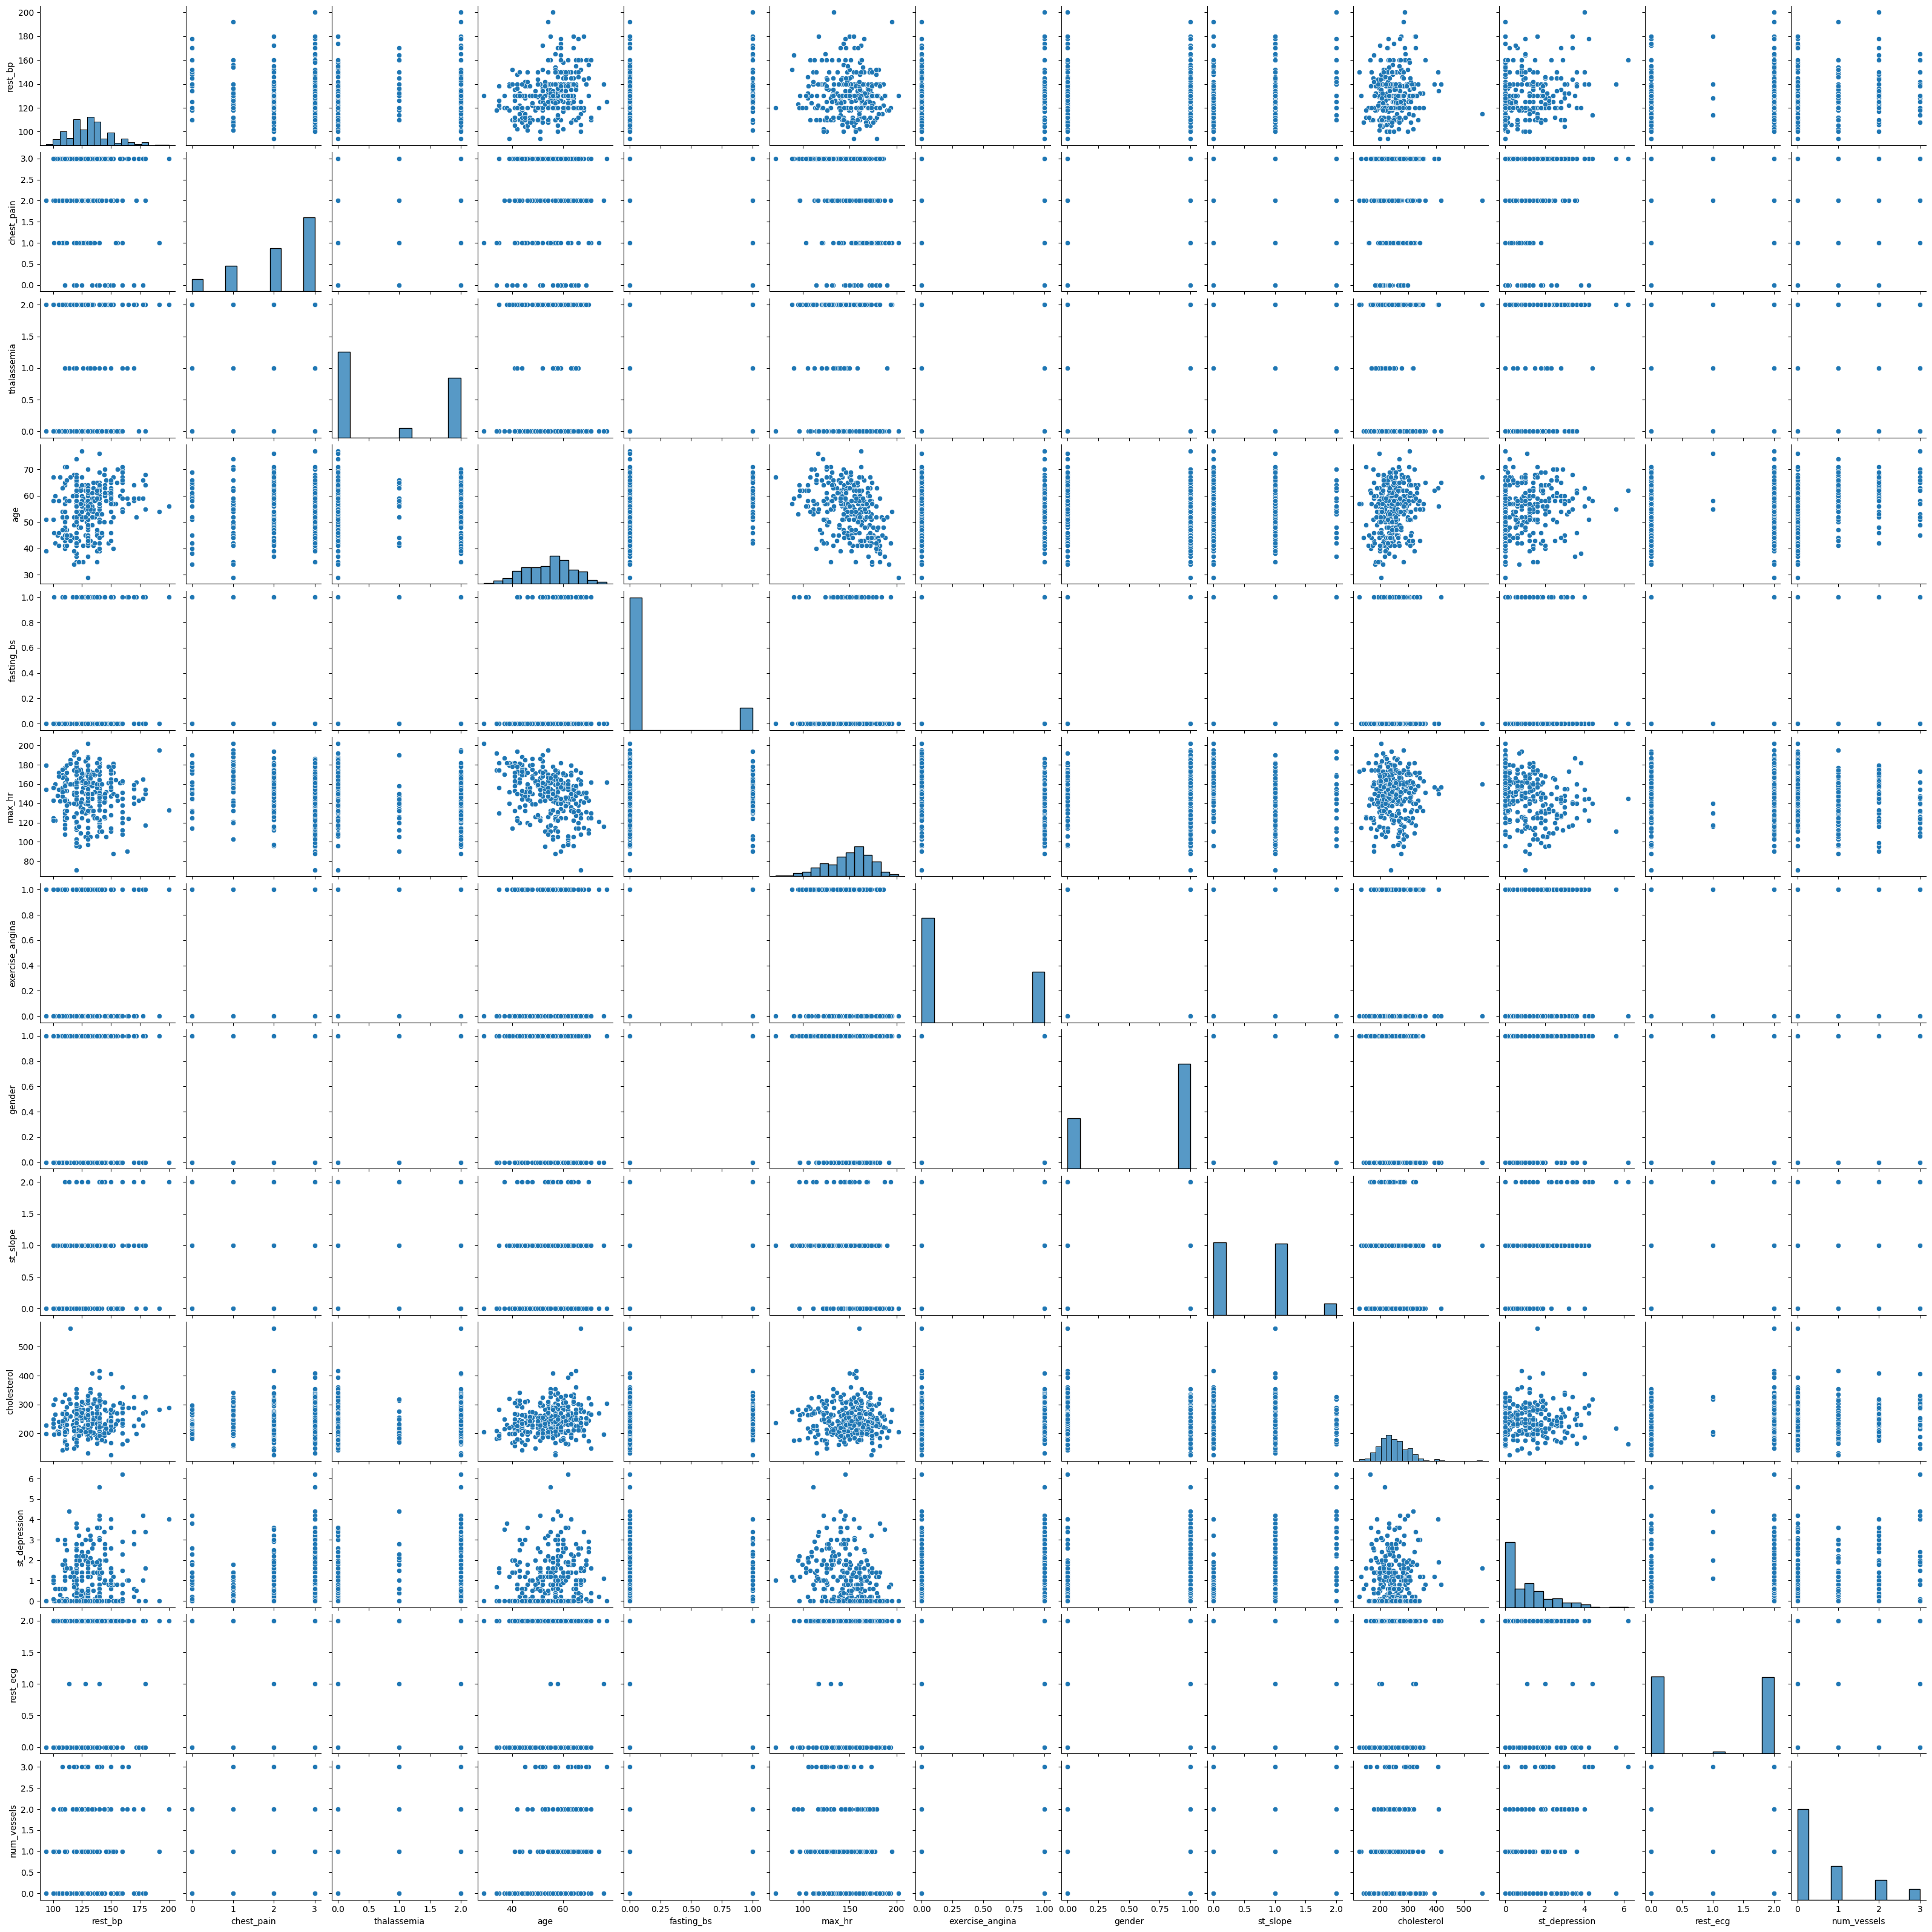

In [ ]:
sns.pairplot(rawDF)
plt.show()

After pairplot, we add boxplot into our analysis to have better look on our dataset.

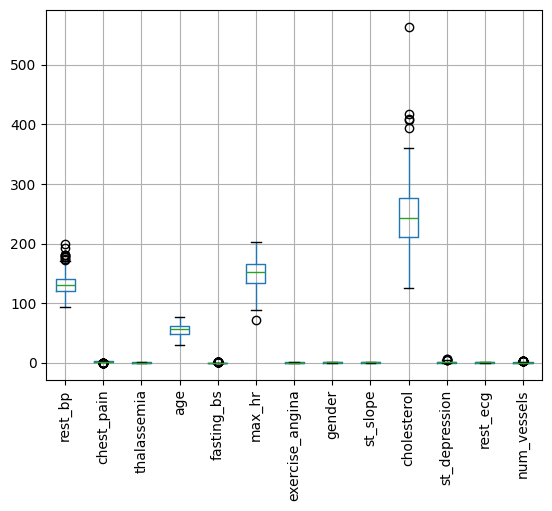

In [ ]:
rawDF.boxplot()
plt.xticks(rotation=90)
plt.show()

Variables such as 'rest_bp', 'age', 'max_hr', and 'cholesterol' are continuous and show a range of values. Notably, cholesterol has a larger IQR, indicating more variability, and also presents several outliers, which are individual values that fall far outside the typical range of data.

Categorical variables like 'chest_pain', 'thalassemia', 'fasting_bs', 'exercise_angina', 'gender', 'st_slope', 'rest_ecg', and 'num_vessels' are plotted as well but with less informative boxplots since these categories represent discrete bins rather than continuous data. For these, the distribution of data points across the categories can be seen; however, boxplots are generally less informative for categorical data and are typically visualized using bar plots or count plots.

For continuous variables, the boxplot provides a good visual summary of the central tendency, dispersion, and outliers. This visualization is helpful in comparing these features and identifying any variables that may require further analysis or transformation, such as handling outliers or scaling the data before applying machine learning techniques like logistic regression.

In [ ]:
rawDF['cholesterol'].max()

564


The below code snippet is for calculating the interquartile range (IQR) of the cholesterol variable from the rawDF DataFrame and then using it to determine the lower and upper limits typically used for identifying outliers.

Here's the step-by-step explanation:

q1=rawDF['cholesterol'].quantile(0.25)
This calculates the first quartile (Q1) of the cholesterol data, which is the value below which 25% of the data falls.

q3=rawDF['cholesterol'].quantile(0.75)
This calculates the third quartile (Q3) of the cholesterol data, which is the value below which 75% of the data falls.

iqr=q3-q1
This computes the interquartile range (IQR), which is the range between the first and third quartiles. The IQR is a measure of the spread of the middle 50% of the data.

ll=q1-(1.5*iqr)
This calculates the lower limit (ll) for outlier detection. Any data point below this limit can be considered an outlier. It is computed as 1.5 times the IQR below the first quartile.

ul=q3+(1.5*iqr)
This calculates the upper limit (ul) for outlier detection. Any data point above this limit can be considered an outlier. It is computed as 1.5 times the IQR above the third quartile.

The multiplier of 1.5 is a common choice in statistics for mild outlier detection. It means that any data point that lies more than 1.5 IQRs below the first quartile or above the third quartile is considered an outlier. These outliers are the points that you saw in my boxplot visualizations outside of the whiskers. It's a rule of thumb, and depending on the context or domain, different multipliers (such as 3 for extreme outliers) may be used.

In [ ]:
q1=rawDF['cholesterol'].quantile(0.25)
q3=rawDF['cholesterol'].quantile(0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [ ]:
ul

373.5

As the result we can see that the u1 calculation result is 373.5. This represents the upper limit for outliers in the cholesterol data of the dataset. This means that any value of cholesterol that is greater than 373.5 would be considered an outlier according to the rule of thumb used in the interquartile range (IQR) method for outlier detection.

Below two codes are used for the data cleaning and visualization, specifically related to 'cholesterol'. The first code 'rawDF['cholesterol'].max()' finds the maximum value in the 'cholesterol' column. 'replace(...,ul)' replaces this maximum value with the variable ul (373.5), which, from the previous discussion, we know is the upper limit for outliers calculated using the IQR method.
The entire column, with the maximum value replaced, is then reassigned back to 'rawDF['cholesterol']'.

The second code generate the boxplot for each numerical columns in the dataframe. 'plt.xticks(rotation=90)' rotates the x-axis labels by 90 degrees to make them more readable, especially useful when there are many labels or they are long.

In [ ]:
rawDF['cholesterol'] = rawDF['cholesterol'].replace(rawDF['cholesterol'].max(),ul)

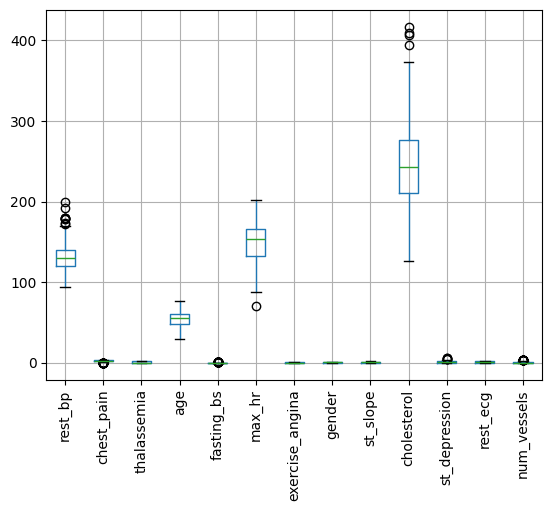

In [ ]:
rawDF.boxplot()
plt.xticks(rotation=90)
plt.show()


When comparing the first boxplot and second boxplots for the 'cholesterol' variable after the execution of the given code, here's a summary of the changes you should observe:
- Maximum Value: The original plot's highest 'cholesterol' data point should have been reduced to the upper limit (ul) in the modified plot.
- Whisker Length: The top whisker of the 'cholesterol' plot will appear shorter in the modified plot, as it will now extend only to the new maximum value (ul) rather than the original maximum.
- Outlier Representation: Outliers that were above the new upper limit (ul) will have either disappeared or been adjusted down to this threshold, resulting in fewer or no points plotted beyond the ul in the modified boxplot.

The overall effect of this change is to reduce the influence of extreme outliers in the 'cholesterol' data by capping them at a defined threshold, which could help in producing a more robust statistical analysis.

The below codes are used in the data preprocessing phase before feeding data into a machine learning model. Below I will explain each code line: 

1. y=rawDF['diagnosis']: This line is extracting the 'diagnosis' column from the rawDF DataFrame and assigning it to the variable y. In machine learning terms, y often denotes the target variable (or labels) that the model will be trained to predict.

2. x=rawDF.drop('diagnosis', axis=1): This line is removing the 'diagnosis' column from the rawDF DataFrame and assigning the remaining columns to the variable x. The axis=1 parameter indicates that a column (not a row) should be dropped. The variable x represents the feature matrix that includes all the data the model will use to learn to predict y.

3. mmax = MinMaxScaler(): This line initializes an instance of MinMaxScaler, a tool from the sklearn.preprocessing module. MinMaxScaler is used to scale the feature data (in x) to a default range of 0 to 1. This ensures that all features contribute equally to the model's training process and helps with the convergence of algorithms that are sensitive to the scale of the input data, such as gradient descent.

4. x = pd.DataFrame(mmax.fit_transform(x), columns=x.columns):
     - mmax.fit_transform(x) computes the minimum and maximum values of x to be used for later scaling and scales the features so that each feature lies between 0 and 1.
    - The result of the scaling is then converted back into a DataFrame with the same column names as the original x dataset.
    - The scaled DataFrame x is useful because many machine learning algorithms perform better or converge faster when features are on a relatively similar scale.

In [ ]:
y=rawDF['diagnosis']
x=rawDF.drop('diagnosis',axis=1)

In [ ]:
mmax = MinMaxScaler()

In [ ]:
mmax = MinMaxScaler()
x=pd.DataFrame(mmax.fit_transform(x),columns=x.columns)
x.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels
0,0.113208,1.000000,0.0,0.791667,0.0,0.541985,0.0,0.0,0.0,0.333333,0.048387,0.0,0.666667
1,0.245283,0.666667,0.0,0.437500,0.0,0.664122,0.0,0.0,0.5,0.319588,0.258065,0.0,0.000000
2,0.301887,1.000000,1.0,0.125000,0.0,0.648855,1.0,1.0,0.0,0.536082,0.000000,1.0,0.000000
3,0.528302,1.000000,1.0,0.708333,0.0,0.633588,0.0,0.0,0.5,0.965636,0.645161,1.0,1.000000
4,0.433962,1.000000,1.0,0.354167,0.0,0.374046,1.0,1.0,0.5,0.635739,0.290323,0.0,0.666667


The table above shows that our data preparation went successfully (all the variables are between 0-1).

The code below is for performing the logistic regression model using 'stastmodel' libraryin Python. 

In [ ]:
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
print(model.summary())
# This logistic regression shows the p value of each categories with the diagnosis, if the p < 0.05, which means the categories has higher strategic relationship with the "object". 
# R-square show how will the data fits with model. R>0.5, considered reasonable. 

Optimization terminated successfully.
         Current function value: 0.341446
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  297
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           13
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                  0.5053
Time:                        14:28:53   Log-Likelihood:                -101.41
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.685e-37
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.4103      1.517     -2.908      0.004      -7.383      -1.437
rest_bp       

The result above indicates the summary headers gives the estimated coefficients (coef), their standard errors (std err), the z-scores (z), the associated p-values (P>|z|), and the 95% confidence intervals ([0.025, 0.975]) for each predictor.
Coefficient Table:
In the table, we can see the estimated effect of each predictor on the log odds of diagnosis, with the following key points:
- Coefficients with p-values below a typical alpha level (like 0.05) are usually considered statistically significant. For example, 'rest_bp', 'chest_pain', 'thalassemia', 'max_hr', 'exercise_angina', 'gender', and 'num_vessels' appear significant.
- Positive coefficients suggest a positive association with the probability of the outcome variable being 1, while negative coefficients suggest a negative association.
- The magnitude of the coefficient represents the effect size. For example, 'num_vessels' has a coefficient of 3.7893, indicating a strong positive association with the diagnosis being 1.

In summary, this logistic regression model is a statistical method to understand the relationship between various predictors and a binary response variable (diagnosis), and the result gives us a comprehensive statistical summary of the model.

In the following step, we started our train_test_split along with the result of our model. 

In [ ]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
lr=LogisticRegression()

In [ ]:
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

For the LogisticRegression()
The TRAIN accuracy is 0.8648648648648649
The ROC score for TRAIN data is 0.863003663003663


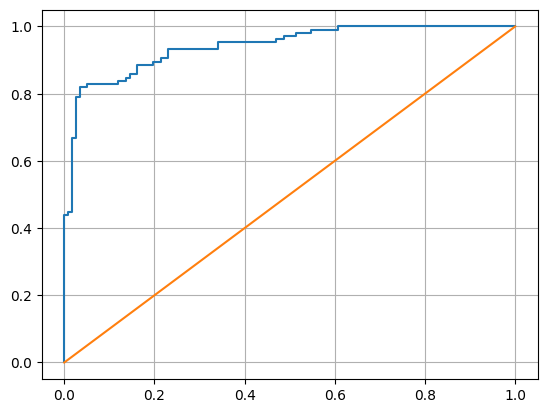

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7466666666666667
The ROC score for TEST data is 0.7430959302325582


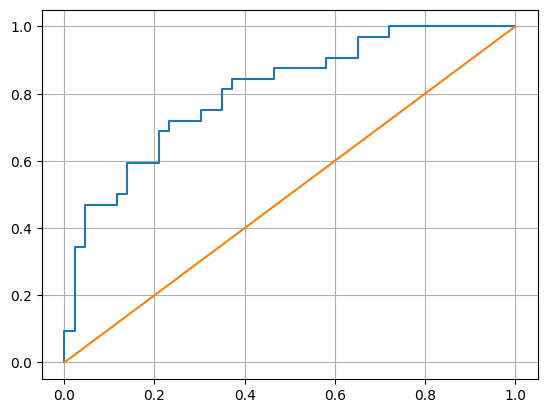

In [ ]:
predictor(lr)

The train and test accuracy results, along with the ROC scores, given that a comprehensive picture of the logistic regression model's performance.

- Train Accuracy (0.8744): Indicates the proportion of correct predictions the model made when evaluated on the training data. The high training accuracy suggests that the model fits the training data well.
- Train ROC Score (0.8723): Reflects the model's ability to discriminate between the positive and negative classes in the training data. A score close to 1 indicates excellent discrimination, and a score close to 0.8723 demonstrates good discrimination.

- Test Accuracy (0.7444): The model correctly predicts outcomes 74.44% of the time on the test data. This is a step down from the training accuracy and may suggest overfitting on the training data or that the model does not generalize as well to unseen data.
- Test ROC Score (0.7414): This score measures the model's discrimination ability on the test set. A score of 0.7414 also indicates good discrimination, albeit not as high as the training ROC score.

Conclusion:
- The drop in both accuracy and ROC score from the training data to the test data suggests that the model might be overfitting to the training data. Overfitting occurs when a model learns patterns that are specific to the training data, which do not generalize well to new data.
- The test results are still relatively strong, which means the model has learned patterns that do have some predictive power on new data.
- The similarity of the accuracy and ROC scores suggests consistent performance of the model across different evaluation metrics.

The ROC curve mentioned (which cannot be directly viewed here) likely shows the trade-off between the true positive rate and false positive rate at various threshold settings for both the training and test datasets. The curve gives a visual representation of the model's classification ability at different levels of decision thresholds.

Lets try to exclude the categories which p-values exceed 0.05 to see if there will be some differences on logistic regression result and its accuracy. 

In [ ]:
# Exclude variables with p-value > 0.05
rawDF_adjusted = rawDF.drop(['age', 'fasting_bs', 'st_slope', 'st_depression', 'rest_ecg'], axis=1)

# Add constant to the adjusted DataFrame
xc_adjusted = sm.add_constant(rawDF_adjusted)

# Fit the logistic regression model with the adjusted predictors
model_adjusted = sm.Logit(y, xc_adjusted).fit()

# Print the summary of the adjusted model
print(model_adjusted.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  297
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                            9
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                   1.000
Time:                        14:28:53   Log-Likelihood:            -9.2129e-06
converged:                      False   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.033e-82
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -33.2533   1.28e+04     -0.003      0.998   -2.52e+04    2.51e+04
rest_bp             0.0989     62.535      0.002  

c:\Users\Buhat\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Buhat\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Buhat\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Buhat\anaconda3\envs\DataScience\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.w

As result, it is obvious that if we exclude the categories with the p-value above 0.05, none of the categories are statistically significant. 

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
lr=LogisticRegression()

For the LogisticRegression()
The TRAIN accuracy is 0.8743961352657005
The ROC score for TRAIN data is 0.8723254504504505


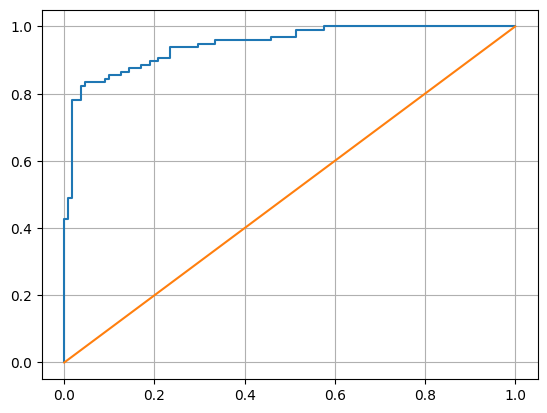

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7444444444444445
The ROC score for TEST data is 0.7414136386261821


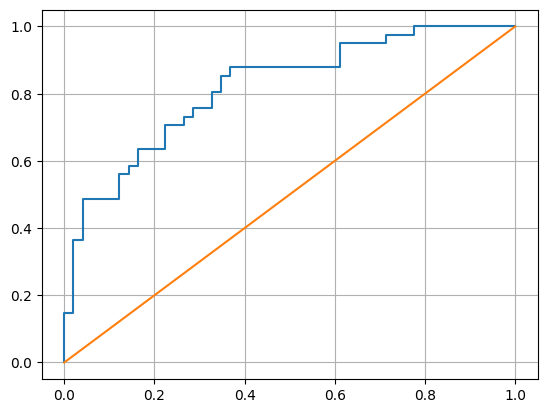

In [ ]:
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

predictor(lr)

However, by excluding the p-value above 0.05 does not impact the result of the model. The only impact is the Logistic Regression Result.

Naive Bayes:

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

#Importing the data packages used for the naive bayes

In [6]:
rawDF = pd.read_csv('heart_data.csv')
rawDF.head()

#Importing the data

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [7]:
X = rawDF.drop(columns=["diagnosis"])
y = rawDF["diagnosis"]

#Create X and y to put into the model

mean_diagnosis = np.mean(rawDF['diagnosis'])
print('Mean diagnosis:', mean_diagnosis)

#Checking the Mean of the diagnosis to see how much of an improvement the model is over just guessing

Mean diagnosis: 0.4612794612794613


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

#Training the data by splitting it into a part thats used for training and a part that is used for testing. Then applying the GaussianNB model

GaussianNB()

In [9]:
y_pred = model.predict(X_test)

#Running the model

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

#Checking how accurate the model is at predicting the diagnosis

Test accuracy: 0.7333333333333333


In [11]:
matrix = confusion_matrix(y_test, y_pred)
pd.DataFrame(matrix)
print('Confusion matrix')
print(matrix)
#Applies the model and put the results into a confusion matrix
#The results show the prediction. In total 44 times we predicted right and 16 times we predicted wrong.

Confusion matrix
[[25  8]
 [ 8 19]]


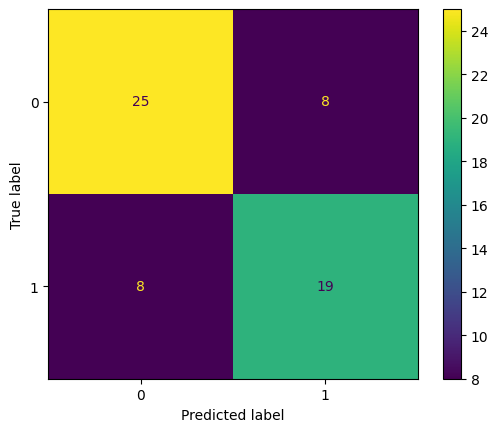

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

#Better way of displaying the confusionmatrix

Conclusion:

The logistic regression model demonstrates good performance on the training data but shows signs of overfitting, as evidenced by the performance drop on the test data. Despite this, the model still maintains a respectable level of accuracy and discriminatory ability when it comes to predicting new data. The ROC curves, assuming the first image represents the training data and the second one represents the test data, both show good model performance, though they indicate a perfect model fit on the training data and a good fit on the test data. The area under the ROC curve is considerably above 0.5 (which would be random guessing), suggesting that the model has learned relevant patterns.

However, it's important to consider strategies to reduce the overfitting, such as cross-validation, regularization, or getting more training data. The drop in performance on the test set also suggests that we should evaluate model robustness further, possibly by testing on additional external datasets or using techniques like bootstrapping to assess stability.

The confusion matrix image suggests that while the model is better at predicting the negative class (more true negatives), there are still a substantial number of false negatives, indicating that the model could be improved in terms of sensitivity. Overall, the model appears to be useful but may benefit from further tuning and validation.

The Naive Bayes model wasn't too hard to make by just following the workbook and it gives a prediction that is 73.3% accurate, wich is 27,2% more accurate then just diagnosing all patient with the disease. The 73.3% accuracy ratio consists of 44 right predictions and 16 wrong predictions.

Out of all 3 the models we used the logisticregression model was the most accurate with a test accuracy of 0.7444 (74.4%).